In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

In [2]:
import string
random = np.random.RandomState(11116)
n_points = 30
data = random.randn(n_points, n_points)

def random_word(length):
    letters = list(string.ascii_lowercase)
    letters_and_spaces = letters + [' ']
    
    if length < 3:
        label = ''.join(random.choice(letters, size=length))
    else:
        label = random.choice(letters)
        # allow spaces but not in first or last letter
        label += ''.join(random.choice(letters_and_spaces, size=length - 2))
        label += random.choice(letters)
        
    return label    

min_length = 5
max_length = 20 

labels = list(map(random_word, random.randint(min_length, max_length+1, size=n_points)))


In [3]:
from cleanlabels.cleanlabels import arrange_labels_force_directed

/Users/saulius/.virtualenvs/scientific-py3/lib/python3.4/site-packages/networkx/drawing/layout.py:330: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if pos==None:


 Temperature        Energy    Accept   Improve     Elapsed   Remaining
        2.00        130.79                         0:00:00            
        0.74         35.14    33.20%    17.20%     0:00:10     0:01:29
        0.28         21.37    20.45%    10.20%     0:00:20     0:01:18
        0.10         15.97    12.25%     6.60%     0:00:29     0:01:08
        0.04         10.54     7.20%     4.00%     0:00:39     0:00:58
        0.01          9.97     3.15%     1.75%     0:00:49     0:00:49
        0.01          9.74     2.15%     1.45%     0:00:58     0:00:39
        0.00          9.50     0.90%     0.70%     0:01:08     0:00:29
        0.00          9.46     0.20%     0.20%     0:01:18     0:00:19
        0.00          9.46     0.20%     0.15%     0:01:27     0:00:10
        0.00          9.34     0.45%     0.40%     0:01:37     0:00:00


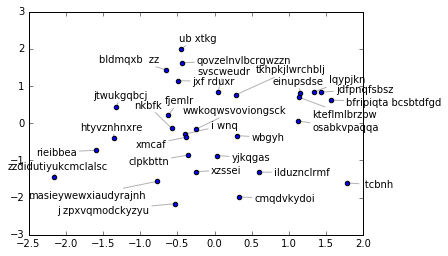

In [4]:
from scipy.optimize import minimize
import networkx as nx
plt.figure()

ax = plt.gca()
point_radius=0.05
renderer = ax.get_figure().canvas.get_renderer()

anchor_x = data[0]
anchor_y = data[1]

ax.scatter(anchor_x, anchor_y)


arrange_labels_force_directed(anchor_x, anchor_y, labels, ax=ax, 
                              annotation_kwargs=dict(arrowprops=dict(arrowstyle='-',
                                                                     shrinkA=0, shrinkB=0,
                                                                     connectionstyle="arc3",
                                                                     color='black',
                                                                                                                                           alpha=.3)))
